# Clustering Project Begins

In [158]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



In [159]:
# Reading the data

data= pd.read_csv("wheatseeds (1).csv")

data.describe()


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [160]:
data.shape

(199, 8)

In [161]:
data.size

1592

In [162]:
data= data.drop('Type', axis=1)

In [163]:
data

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [164]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove'],
      dtype='object')

### Renaming the columns

In [165]:
data = data.rename(columns={
    'Kernel.Length': 'K_Length',
    'Kernel.Width': 'K_Width',
    'Asymmetry.Coeff': 'Asymmetry_Coeff',
    'Kernel.Groove': 'Kernel_Groove'

})

In [166]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'K_Length', 'K_Width',
       'Asymmetry_Coeff', 'Kernel_Groove'],
      dtype='object')

In [167]:
data.head()

,Area,Perimeter,Compactness,K_Length,K_Width,Asymmetry_Coeff,Kernel_Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [168]:
data.shape

(199, 7)

In [169]:
data.size

1393

In [170]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'K_Length', 'K_Width',
       'Asymmetry_Coeff', 'Kernel_Groove'],
      dtype='object')

In [171]:
data.Area

0      15.26
1      14.88
2      14.29
3      13.84
4      16.14
       ...  
194    12.19
195    11.23
196    13.20
197    11.84
198    12.30
Name: Area, Length: 199, dtype: float64

### Splitting Features

In [172]:
x = data[['Area', 'Perimeter', 'Compactness', 'K_Length', 'K_Width',
       'Asymmetry_Coeff', 'Kernel_Groove']]

In [173]:
x

,Area,Perimeter,Compactness,K_Length,K_Width,Asymmetry_Coeff,Kernel_Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


### Scaling the value of x 

In [174]:
scaler= StandardScaler()

x_scaled = scaler.fit_transform(x)

type(x_scaled)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

x_scaled

,Area,Perimeter,Compactness,K_Length,K_Width,Asymmetry_Coeff,Kernel_Groove
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825
...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368


In [175]:
k_model = KMeans(n_clusters= 2)

k_model.fit(x_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


### Identifying the number of clusters

In [176]:
# Kaiser's Rule -> eigenvalues >1

# Calculating pca for data visualization

pca = PCA()

pca.fit(x_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [177]:
# Calculating the eigen values

eigenvalues = pca.explained_variance_
eigenvalues

array([5.05691778e+00, 1.20519035e+00, 6.79631565e-01, 6.85475795e-02,
       1.89074688e-02, 5.34241202e-03, 8.16380060e-04])

### Identifying kaiser's clusters

In [178]:
kaiser_clusters = np.sum(eigenvalues> 1)

print("Kaiser's rule suggests:", kaiser_clusters, "clusters")

Kaiser's rule suggests: 2 clusters


### Plotting eigenvalues

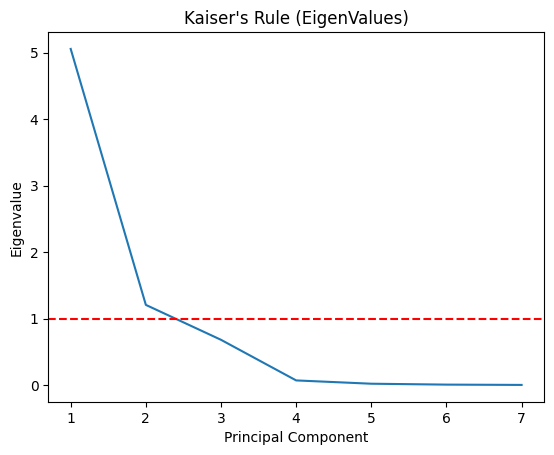

In [179]:
plt.plot(range(1, len(eigenvalues)+1),eigenvalues)
plt.axhline(y=1, color='r',linestyle='--')
plt.title("Kaiser's Rule (EigenValues)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

### Elbow Method + Inertia

In [180]:
inertia = []

k_values= range(1,11)

for k in k_values:
    km = KMeans(n_clusters= k, random_state=42, n_init= 10)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

In [181]:
inertia  

[1393.0,
 620.0300295507129,
 408.55890121591733,
 349.63666406494394,
 309.2889785443699,
 281.1466687351489,
 249.92057324727767,
 229.0172808359318,
 213.2062217992729,
 198.05179897250827]

### Plotting the above thing

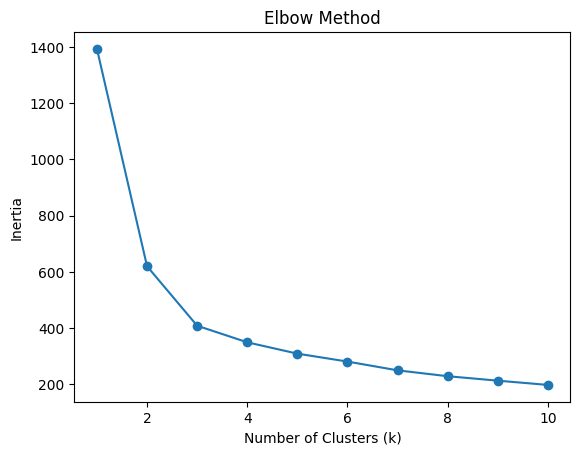

In [182]:
plt.plot(k_values,inertia, marker= 'o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

### Clustering the data items

In [183]:
k_model = KMeans(n_clusters= 1, random_state= 42)

k_model.fit(x_scaled)

clusters= k_model.fit_predict(x_scaled)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [184]:
data['Clusters'] = clusters

print(data.head())

    Area  Perimeter  Compactness  K_Length  K_Width  Asymmetry_Coeff  \
0  15.26      14.84       0.8710     5.763    3.312            2.221   
1  14.88      14.57       0.8811     5.554    3.333            1.018   
2  14.29      14.09       0.9050     5.291    3.337            2.699   
3  13.84      13.94       0.8955     5.324    3.379            2.259   
4  16.14      14.99       0.9034     5.658    3.562            1.355   

   Kernel_Groove  Clusters  
0          5.220         0  
1          4.956         0  
2          4.825         0  
3          4.805         0  
4          5.175         0  


### Visualization of Obtained Clusters

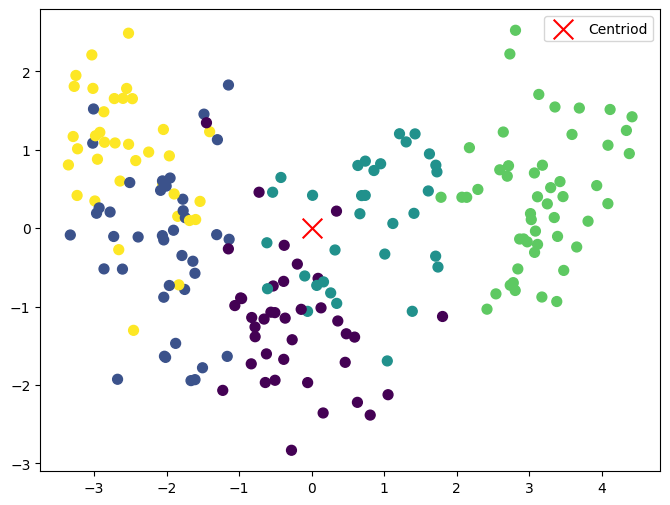

In [185]:
pca_2d = PCA(n_components= 2)

x_pca = pca_2d.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:,1], c=k_labels, cmap="viridis", s=50)
plt.scatter(k_model.cluster_centers_[:, 0], k_model.cluster_centers_[:,1], c="red", marker="x", s=200, label="Centriod")
plt.legend()
plt.show()